In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = df.columns.str.lower()  # makes all column names lowercase
df.head()


,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


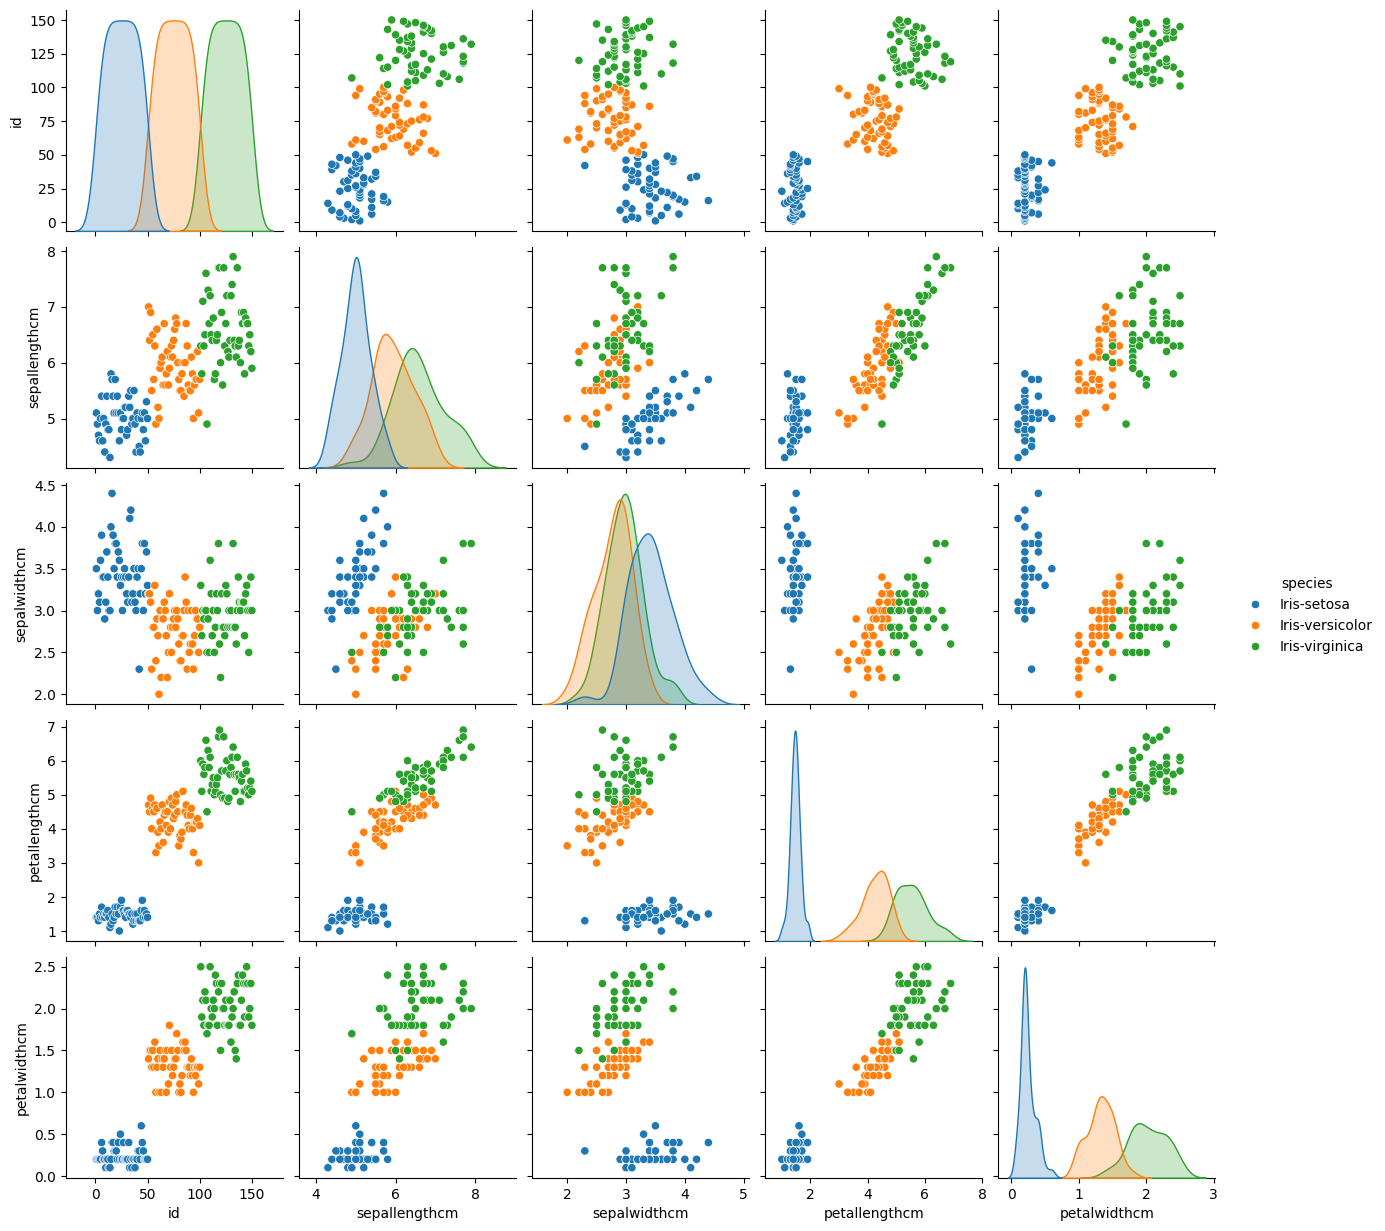

ValueError: could not convert string to float: 'Iris-setosa'

In [4]:
df.info()
df['species'].value_counts()

# Pairplot
sns.pairplot(df, hue='species')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

X = df[['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [1]:
import pandas as pd

# 1️⃣ Load the dataset
df = pd.read_csv('iris.csv')
print("Original Columns:", df.columns)

# 2️⃣ Drop unnecessary columns
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# 3️⃣ Rename columns for consistency
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
print("Cleaned Columns:", df.columns)

# 4️⃣ Remove any duplicates
df = df.drop_duplicates()

# 5️⃣ Check for missing values
print("Missing Values:\n", df.isnull().sum())

# 6️⃣ Strip spaces from string columns (like species)
df['species'] = df['species'].str.strip()

# 7️⃣ Optional: Encode species as numbers (for ML)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# 8️⃣ Save cleaned CSV (optional)
df.to_csv('iris_cleaned.csv', index=False)

# 9️⃣ Quick look at cleaned data
print(df.head())


Original Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Cleaned Columns: Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')
Missing Values:
 sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64
   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


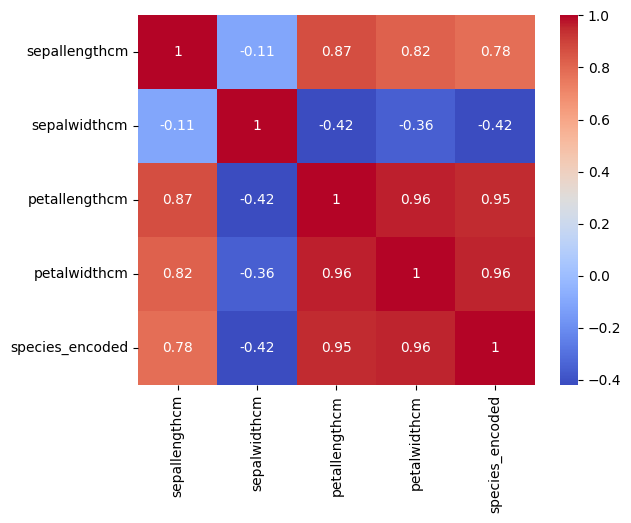

   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [2]:
import pandas as pd

# 1️⃣ Load CSV and skip any extra headers
df = pd.read_csv('iris.csv', header=0)

# 2️⃣ Drop duplicate rows (including accidental header rows)
df = df.drop_duplicates()

# 3️⃣ Drop 'Id' column
if 'id' in df.columns or 'Id' in df.columns:
    df = df.drop(columns=[col for col in df.columns if col.lower() == 'id'])

# 4️⃣ Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# 5️⃣ Strip strings in 'species' column
df['species'] = df['species'].str.strip()

# 6️⃣ Encode species for ML
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# 7️⃣ Check numeric-only DataFrame for correlations
numeric_df = df.select_dtypes(include='number')

# 8️⃣ Correlation heatmap will work now
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 9️⃣ Save cleaned CSV (optional)
df.to_csv('iris_cleaned.csv', index=False)

# 10️⃣ Quick look
print(df.head())
